In [1]:
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Data.csv')

In [3]:
print(df)

      Country   Age   Salary Purchased
0       India  34.0  92000.0       Yes
1   Sri lanka  22.0  25000.0       Yes
2       China  31.0  74000.0       Yes
3   Sri lanka  29.0      NaN        No
4       China  55.0  98000.0       Yes
5       India  24.0  30000.0        No
6   Sri lanka  28.0  40000.0        No
7       India   NaN  60000.0        No
8       China  51.0  89000.0       Yes
9       India  44.0  78000.0       Yes
10  Sri lanka  21.0  20000.0        No
11      China  25.0  30000.0       Yes
12      India  33.0  45000.0       Yes
13      India  42.0  65000.0       Yes
14  Sri lanka  33.0  22000.0        No


In [4]:
x=df['Salary'].mean()
df['Salary'].fillna(x,inplace=True)

In [5]:
print(df)

      Country   Age        Salary Purchased
0       India  34.0  92000.000000       Yes
1   Sri lanka  22.0  25000.000000       Yes
2       China  31.0  74000.000000       Yes
3   Sri lanka  29.0  54857.142857        No
4       China  55.0  98000.000000       Yes
5       India  24.0  30000.000000        No
6   Sri lanka  28.0  40000.000000        No
7       India   NaN  60000.000000        No
8       China  51.0  89000.000000       Yes
9       India  44.0  78000.000000       Yes
10  Sri lanka  21.0  20000.000000        No
11      China  25.0  30000.000000       Yes
12      India  33.0  45000.000000       Yes
13      India  42.0  65000.000000       Yes
14  Sri lanka  33.0  22000.000000        No


In [6]:
x=df['Age'].mean()
df['Age'].fillna(x,inplace=True)

In [7]:
print(df)

      Country        Age        Salary Purchased
0       India  34.000000  92000.000000       Yes
1   Sri lanka  22.000000  25000.000000       Yes
2       China  31.000000  74000.000000       Yes
3   Sri lanka  29.000000  54857.142857        No
4       China  55.000000  98000.000000       Yes
5       India  24.000000  30000.000000        No
6   Sri lanka  28.000000  40000.000000        No
7       India  33.714286  60000.000000        No
8       China  51.000000  89000.000000       Yes
9       India  44.000000  78000.000000       Yes
10  Sri lanka  21.000000  20000.000000        No
11      China  25.000000  30000.000000       Yes
12      India  33.000000  45000.000000       Yes
13      India  42.000000  65000.000000       Yes
14  Sri lanka  33.000000  22000.000000        No


In [8]:
df=pd.get_dummies(df,columns=['Country','Purchased'],drop_first=True)

In [9]:
print(df)

          Age        Salary  Country_India  Country_Sri lanka  Purchased_Yes
0   34.000000  92000.000000              1                  0              1
1   22.000000  25000.000000              0                  1              1
2   31.000000  74000.000000              0                  0              1
3   29.000000  54857.142857              0                  1              0
4   55.000000  98000.000000              0                  0              1
5   24.000000  30000.000000              1                  0              0
6   28.000000  40000.000000              0                  1              0
7   33.714286  60000.000000              1                  0              0
8   51.000000  89000.000000              0                  0              1
9   44.000000  78000.000000              1                  0              1
10  21.000000  20000.000000              0                  1              0
11  25.000000  30000.000000              0                  0              1

In [16]:
df=pd.get_dummies(df,columns=['Purchased_Yes'],drop_first=True)

In [17]:
print(df)

          Age        Salary  Country_India  Country_Sri lanka  Purchased_Yes_1
0   34.000000  92000.000000              1                  0                1
1   22.000000  25000.000000              0                  1                1
2   31.000000  74000.000000              0                  0                1
3   29.000000  54857.142857              0                  1                0
4   55.000000  98000.000000              0                  0                1
5   24.000000  30000.000000              1                  0                0
6   28.000000  40000.000000              0                  1                0
7   33.714286  60000.000000              1                  0                0
8   51.000000  89000.000000              0                  0                1
9   44.000000  78000.000000              1                  0                1
10  21.000000  20000.000000              0                  1                0
11  25.000000  30000.000000              0          

In [22]:
X=df[['Age','Salary']]
scaledX=StandardScaler().fit_transform(X)
print(scaledX)

[[ 0.02897151  1.42592213]
 [-1.1878321  -1.14622202]
 [-0.27522939  0.73489833]
 [-0.47802999  0.        ]
 [ 2.15837785  1.6562634 ]
 [-0.9850315  -0.95427097]
 [-0.57943029 -0.57036885]
 [ 0.          0.19743537]
 [ 1.75277664  1.3107515 ]
 [ 1.04297453  0.88845917]
 [-1.28923241 -1.33817308]
 [-0.8836312  -0.95427097]
 [-0.07242879 -0.3784178 ]
 [ 0.84017393  0.38938643]
 [-0.07242879 -1.26139266]]


In [28]:
df=pd.read_csv('dirtydata.csv')
print(df)

    Duration          Date  Pulse  Maxpulse  Calories
0         60  '2020/12/01'    110       130     409.1
1         60  '2020/12/02'    117       145     479.0
2         60  '2020/12/03'    103       135     340.0
3         45  '2020/12/04'    109       175     282.4
4         45  '2020/12/05'    117       148     406.0
5         60  '2020/12/06'    102       127     300.0
6         60  '2020/12/07'    110       136     374.0
7        450  '2020/12/08'    104       134     253.3
8         30  '2020/12/09'    109       133     195.1
9         60  '2020/12/10'     98       124     269.0
10        60  '2020/12/11'    103       147     329.3
11        60  '2020/12/12'    100       120     250.7
12        60  '2020/12/12'    100       120     250.7
13        60  '2020/12/13'    106       128     345.3
14        60  '2020/12/14'    104       132     379.3
15        60  '2020/12/15'     98       123     275.0
16        60  '2020/12/16'     98       120     215.2
17        60  '2020/12/17'  

In [34]:
df['Date']=pd.to_datetime(df['Date'])
print(df)

    Duration       Date  Pulse  Maxpulse  Calories
0         60 2020-12-01    110       130     409.1
1         60 2020-12-02    117       145     479.0
2         60 2020-12-03    103       135     340.0
3         45 2020-12-04    109       175     282.4
4         45 2020-12-05    117       148     406.0
5         60 2020-12-06    102       127     300.0
6         60 2020-12-07    110       136     374.0
7        450 2020-12-08    104       134     253.3
8         30 2020-12-09    109       133     195.1
9         60 2020-12-10     98       124     269.0
10        60 2020-12-11    103       147     329.3
11        60 2020-12-12    100       120     250.7
12        60 2020-12-12    100       120     250.7
13        60 2020-12-13    106       128     345.3
14        60 2020-12-14    104       132     379.3
15        60 2020-12-15     98       123     275.0
16        60 2020-12-16     98       120     215.2
17        60 2020-12-17    100       120     300.0
18        45 2020-12-18     90 

In [35]:
df=df.dropna()
print(df)

    Duration       Date  Pulse  Maxpulse  Calories
0         60 2020-12-01    110       130     409.1
1         60 2020-12-02    117       145     479.0
2         60 2020-12-03    103       135     340.0
3         45 2020-12-04    109       175     282.4
4         45 2020-12-05    117       148     406.0
5         60 2020-12-06    102       127     300.0
6         60 2020-12-07    110       136     374.0
7        450 2020-12-08    104       134     253.3
8         30 2020-12-09    109       133     195.1
9         60 2020-12-10     98       124     269.0
10        60 2020-12-11    103       147     329.3
11        60 2020-12-12    100       120     250.7
12        60 2020-12-12    100       120     250.7
13        60 2020-12-13    106       128     345.3
14        60 2020-12-14    104       132     379.3
15        60 2020-12-15     98       123     275.0
16        60 2020-12-16     98       120     215.2
17        60 2020-12-17    100       120     300.0
19        60 2020-12-19    103 

In [36]:
x=df['Calories'].mean()
df['Calories'].fillna(x,inplace=True)

In [37]:
print(df)

    Duration       Date  Pulse  Maxpulse  Calories
0         60 2020-12-01    110       130     409.1
1         60 2020-12-02    117       145     479.0
2         60 2020-12-03    103       135     340.0
3         45 2020-12-04    109       175     282.4
4         45 2020-12-05    117       148     406.0
5         60 2020-12-06    102       127     300.0
6         60 2020-12-07    110       136     374.0
7        450 2020-12-08    104       134     253.3
8         30 2020-12-09    109       133     195.1
9         60 2020-12-10     98       124     269.0
10        60 2020-12-11    103       147     329.3
11        60 2020-12-12    100       120     250.7
12        60 2020-12-12    100       120     250.7
13        60 2020-12-13    106       128     345.3
14        60 2020-12-14    104       132     379.3
15        60 2020-12-15     98       123     275.0
16        60 2020-12-16     98       120     215.2
17        60 2020-12-17    100       120     300.0
19        60 2020-12-19    103 

In [41]:
df.drop_duplicates(inplace = True)

In [42]:
print(df)

    Duration       Date  Pulse  Maxpulse  Calories
0         60 2020-12-01    110       130     409.1
1         60 2020-12-02    117       145     479.0
2         60 2020-12-03    103       135     340.0
3         45 2020-12-04    109       175     282.4
4         45 2020-12-05    117       148     406.0
5         60 2020-12-06    102       127     300.0
6         60 2020-12-07    110       136     374.0
7        450 2020-12-08    104       134     253.3
8         30 2020-12-09    109       133     195.1
9         60 2020-12-10     98       124     269.0
10        60 2020-12-11    103       147     329.3
11        60 2020-12-12    100       120     250.7
13        60 2020-12-13    106       128     345.3
14        60 2020-12-14    104       132     379.3
15        60 2020-12-15     98       123     275.0
16        60 2020-12-16     98       120     215.2
17        60 2020-12-17    100       120     300.0
19        60 2020-12-19    103       123     323.0
20        45 2020-12-20     97 

In [43]:
df.loc[7,'Duration']=45

In [44]:
print(df)

    Duration       Date  Pulse  Maxpulse  Calories
0         60 2020-12-01    110       130     409.1
1         60 2020-12-02    117       145     479.0
2         60 2020-12-03    103       135     340.0
3         45 2020-12-04    109       175     282.4
4         45 2020-12-05    117       148     406.0
5         60 2020-12-06    102       127     300.0
6         60 2020-12-07    110       136     374.0
7         45 2020-12-08    104       134     253.3
8         30 2020-12-09    109       133     195.1
9         60 2020-12-10     98       124     269.0
10        60 2020-12-11    103       147     329.3
11        60 2020-12-12    100       120     250.7
13        60 2020-12-13    106       128     345.3
14        60 2020-12-14    104       132     379.3
15        60 2020-12-15     98       123     275.0
16        60 2020-12-16     98       120     215.2
17        60 2020-12-17    100       120     300.0
19        60 2020-12-19    103       123     323.0
20        45 2020-12-20     97 

In [46]:
import pandas as pd

# car_age = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
# car_speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

data=pd.DataFrame({'age':[5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6],
                   'speed':[99,86,87,88,111,86,103,87,94,78,77,85,86]
                  })
print(data)

    age  speed
0     5     99
1     7     86
2     8     87
3     7     88
4     2    111
5    17     86
6     2    103
7     9     87
8     4     94
9    11     78
10   12     77
11    9     85
12    6     86


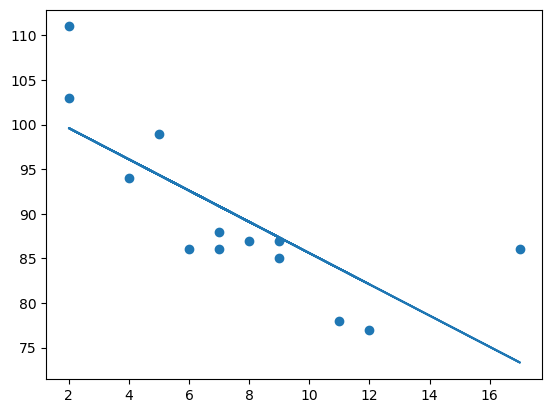

In [49]:
import matplotlib.pyplot as plt
from scipy import stats

age = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope,intercept,r,p,std_err=stats.linregress(age,speed)

def fun(age):
    return slope*age+intercept

model=list(map(fun,age))

plt.scatter(age,speed)
plt.plot(age,model)
plt.show()

In [50]:
print(r)

-0.758591524376155


In [51]:
speed=fun(10)
print(speed)

85.59308314937454


In [52]:
print(p)

0.0026468739224561064


In [98]:
df=pd.read_csv('cars.csv')
print(df)

           Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    13

In [99]:
df_cars=pd.get_dummies(df['Car'])

In [100]:
print(df_cars)

    Audi  BMW  Fiat  Ford  Honda  Hundai  Hyundai  Mazda  Mercedes  Mini  \
0      0    0     0     0      0       0        0      0         0     0   
1      0    0     0     0      0       0        0      0         0     0   
2      0    0     0     0      0       0        0      0         0     0   
3      0    0     1     0      0       0        0      0         0     0   
4      0    0     0     0      0       0        0      0         0     1   
5      0    0     0     0      0       0        0      0         0     0   
6      0    0     0     0      0       0        0      0         0     0   
7      0    0     0     0      0       0        0      0         1     0   
8      0    0     0     1      0       0        0      0         0     0   
9      1    0     0     0      0       0        0      0         0     0   
10     0    0     0     0      0       0        1      0         0     0   
11     0    0     0     0      0       0        0      0         0     0   
12     0    

In [101]:
from sklearn import linear_model


X=pd.concat([df[['Volume','Weight']],df_cars],axis=1)
y=df['CO2']

regression=linear_model.LinearRegression()
regression.fit(X,y)

pred_CO2=regression.predict([[2300,1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])
print(pred_CO2)

[122.45153299]


C:\Users\Arya Jagish\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [102]:
print(regression.coef_)

[ 1.03994638e-02  1.05990028e-02 -1.66396449e+00  7.20328929e-01
 -1.02440447e+00 -2.01717327e+00 -8.40584323e+00 -6.19016944e+00
  4.67681744e+00 -4.94229359e+00 -2.32367445e+00  4.82119147e+00
 -2.27094945e+00 -3.56370312e+00 -2.17065916e+00  4.49093465e+00
  7.73057436e+00  1.22573130e+01 -1.24325123e-01]


In [80]:
import pandas as pd

df=pd.read_csv("insurance.csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [90]:
df_insurance=pd.get_dummies(df[['smoker']])

In [91]:
print(df_insurance)

      smoker_no  smoker_yes
0             0           1
1             1           0
2             1           0
3             1           0
4             1           0
...         ...         ...
1333          1           0
1334          1           0
1335          1           0
1336          1           0
1337          0           1

[1338 rows x 2 columns]


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('insurance.csv')


In [106]:
# Convert categorical variables into numerical using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Split the dataset into features (X) and target (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

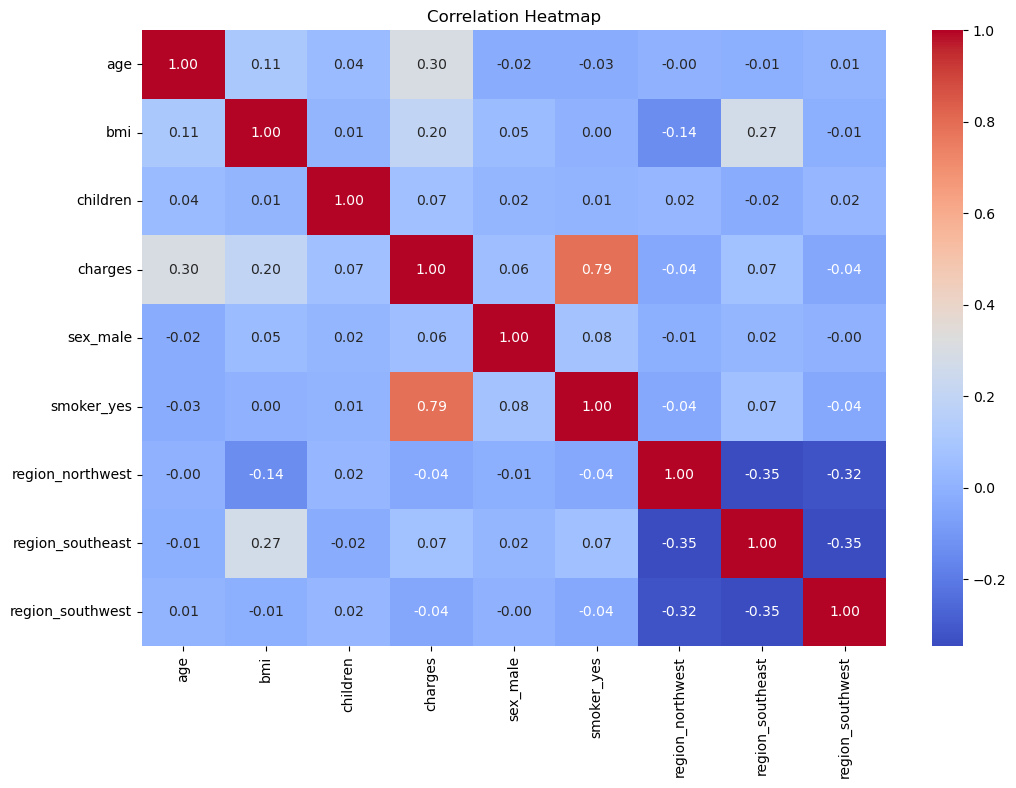

In [108]:
# Create a heatmap to visualize correlations
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [109]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R^2)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")


Mean Squared Error (MSE): 33596915.851361446
R-squared (R^2): 0.7835929767120724
